## **## Data cleaning**

In [69]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


csv_path = "/content/drive/MyDrive/Data Analysis Task List/Data Set For Task/3) Sentiment dataset.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0','Year','Month','Day','Hour'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df[['Retweets','Likes']] = df[['Retweets','Likes']].astype(int)
print("dupes before:", df.duplicated().sum())
df.columns = df.columns.str.capitalize()
df.drop_duplicates(inplace=True)
print(df.isna().sum())
print(df.info())
print(df.describe())
print(df.dtypes)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dupes before: 20
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 731
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       712 non-null    object        
 1   Sentiment  712 non-null    object        
 2   Timestamp  712 non-null    datetime64[ns]
 3   User       712 non-null    object        
 4   Platform   712 non-null    object        
 5   Hashtags   712 non-null    object        
 6   Retweets   712 non-null    int64         
 7   Likes      712 non-null    int64         
 8   Country    712 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 55.6+ KB
None
               

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia
...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK


# Bar plot representing sentiment count based on platform

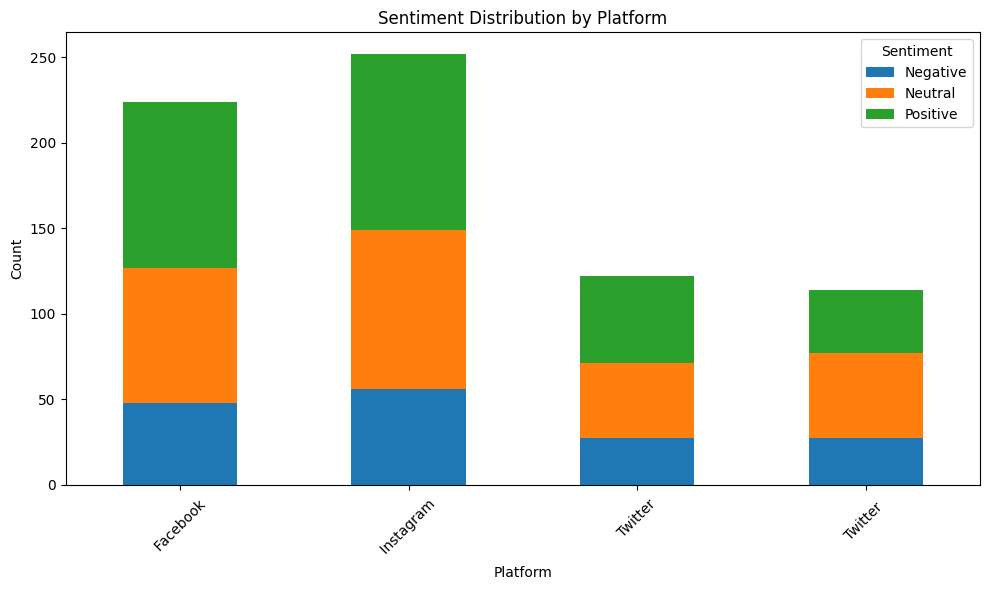

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


Positive = [
    'Happy', 'Happiness', 'Joy', 'Enjoyment', 'Excitement', 'Euphoria', 'Contentment',
    'Gratitude', 'Love', 'Affection', 'Admiration', 'Pride', 'Hope', 'Enthusiasm',
    'Confidence', 'Success', 'Satisfaction', 'Appreciation', 'Motivation', 'Inspiration',
    'Playful', 'Inspired', 'Positivity', 'Kindness', 'Friendship', 'Grateful',
    'Compassion', 'Adoration', 'Amusement', 'Cheerful', 'Delight', 'Elated',
    'Energized', 'Fulfillment', 'Overjoyed', 'Radiance', 'Wonder', 'Zest', 'Optimism',
    'Blessed', 'Triumph', 'Heartwarming', 'Celebration', 'Hopeful', 'Proud', 'Empathetic',
    'Compassionate', 'Playfuljoy', 'Free-Spirited', 'Iconic', 'Ecstasy', 'Engagement',
    'Touched', 'Accomplishment', 'Wonderment', 'Rejuvenation', 'Joyfulreunion','Positive'
]

Negative = [
    'Sadness', 'Grief', 'Despair', 'Disappointment', 'Anger', 'Frustration', 'Fear',
    'Disgust', 'Anxiety', 'Regret', 'Loneliness', 'Jealousy', 'Shame', 'Embarrassed',
    'Sorrow', 'Boredom', 'Hate', 'Bad', 'Depression', 'Bitterness', 'Melancholy',
    'Isolation', 'Loss', 'Heartbreak', 'Betrayal', 'Suffering', 'Hopelessness',
    'Darkness', 'Resentment', 'Numbness', 'Overwhelmed', 'Helplessness', 'Intimidation',
    'Misery', 'Devastated', 'Envy', 'Fearful', 'Desperation', 'Exhaustion',
    'Sad', 'Doubt', 'Pressure', 'Obsession', 'Apprehensive', 'Shattered', 'Tragic',
    'Lostlove', 'Miscalculation', 'Obstacle', 'Negative'
]

Neutral = [
    'Neutral', 'Surprise', 'Acceptance', 'Calmness', 'Serenity', 'Curiosity',
    'Reflection', 'Contemplation', 'Ambivalence', 'Harmony', 'Creativity', 'Tranquility',
    'Peace', 'Mindfulness', 'Whimsy', 'Enchantment', 'Coziness', 'Captivation',
    'Dreamchaser', 'Artisticburst', 'Marvel', 'Exploration', 'Colorful', 'Energy',
    'Charm', 'Emotion', 'Journey', 'Vibrancy', 'Elegance', 'Freedom', 'Solace',
    'Breakthrough', 'Challenge', 'Culinaryodyssey', 'Winter Magic', 'Innerjourney',
    "Nature's Beauty", "Ocean's Freedom", 'Runway Creativity', 'Whispers Of The Past',
    'Creative Inspiration', 'Thrilling Journey', 'Inspiration', 'Dazzle', 'Imagination',
    'Adventure'
]

sentiment_map = {}
for s in Positive:
    sentiment_map[s] = 2
for s in Negative:
    sentiment_map[s] = 0
for s in Neutral:
    sentiment_map[s] = 1


df['Sentiment'] = df['Sentiment'].str.strip().str.title()
df['Sentiment'] = df['Sentiment'].map(sentiment_map).fillna(1).astype(int)

sentiment_counts = df.groupby('Platform')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_counts.columns = ['Negative', 'Neutral', 'Positive']
sentiment_counts = sentiment_counts.astype(int)


sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("the count of each sentiment in various platforms.jpg")
plt.show()


# Bar plot representing that positive sentiment is the most dominating in the platforms

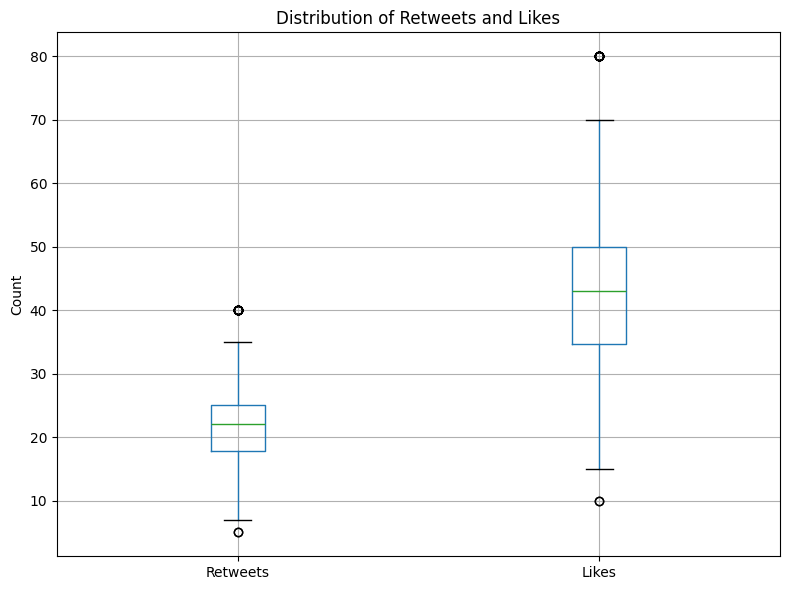

           Sentiment  Retweets     Likes
Sentiment   1.000000  0.249626  0.246795
Retweets    0.249626  1.000000  0.998475
Likes       0.246795  0.998475  1.000000


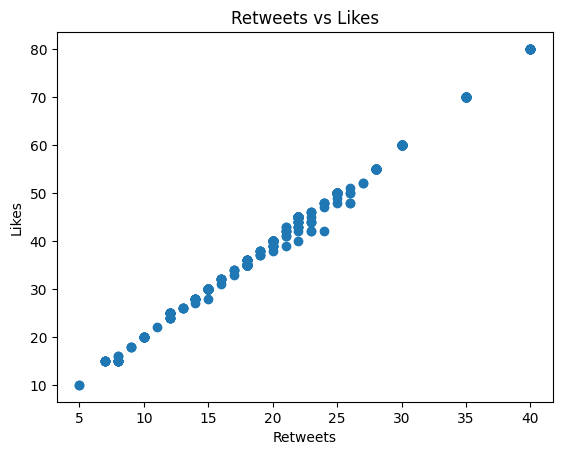

           Sentiment  Retweets     Likes
Sentiment   1.000000  0.249626  0.246795
Retweets    0.249626  1.000000  0.998475
Likes       0.246795  0.998475  1.000000
Sentiment
2    288
1    266
0    158
Name: count, dtype: int64


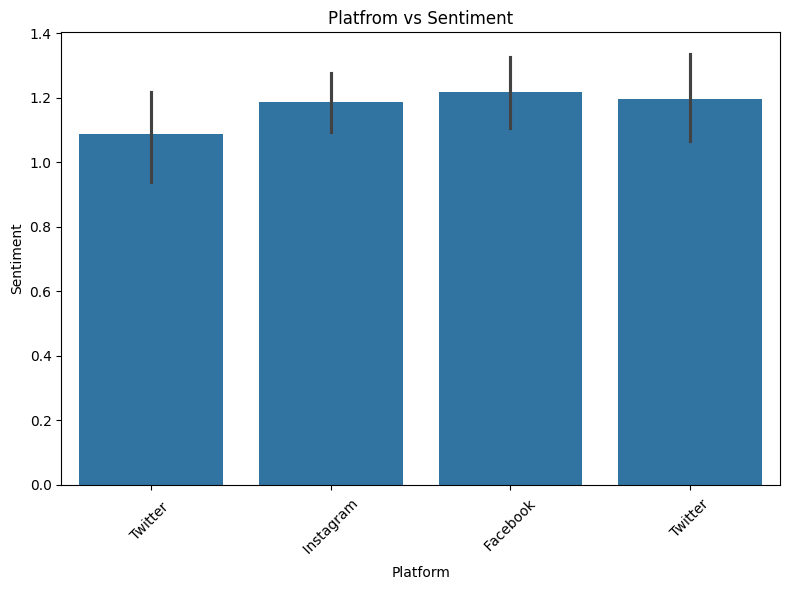

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,2,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA
1,Traffic was terrible this morning. ...,0,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada
2,Just finished an amazing workout! 💪 ...,2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA
3,Excited about the upcoming weekend getaway! ...,2,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK
4,Trying out a new recipe for dinner tonight. ...,1,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia
...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK
728,Attending a surprise birthday party organized ...,2,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA
729,Successfully fundraising for a school charity ...,2,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada
730,"Participating in a multicultural festival, cel...",2,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK


In [71]:
num_cols = ['Retweets', 'Likes']

plt.figure(figsize=(8,6))
df[num_cols].boxplot()
plt.title('Distribution of Retweets and Likes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("boxplot representing distribution of retweets and likes.jpg")
plt.show()
corr = df.corr(numeric_only=True)
print(corr)

plt.figure()
plt.scatter(df['Retweets'], df['Likes'])
plt.title('Retweets vs Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.savefig("scatterplot retweets and likes.jpg")
plt.show()
corr = df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(8, 6))
sns.barplot(x='Platform', y='Sentiment', data=df)


plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('Sentiment')
plt.title('Platfrom vs Sentiment')


print(df['Sentiment'].value_counts())
plt.tight_layout()
plt.savefig("barplot of platform vs sentiment.jpg")
plt.show()

df

# Timeseries decomposed into trend,seasonal and residual and a graph representing the likes and moving average of likes

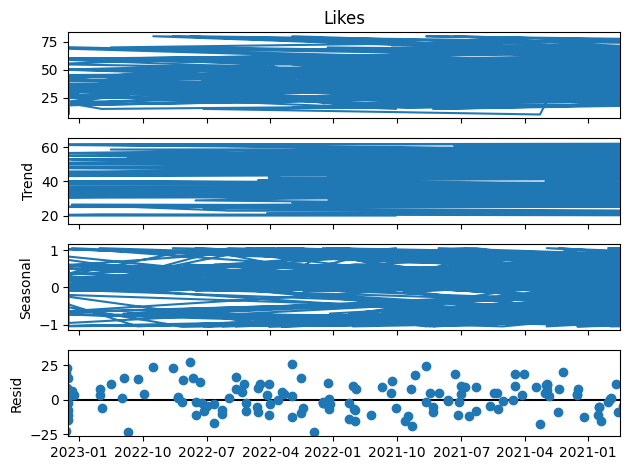

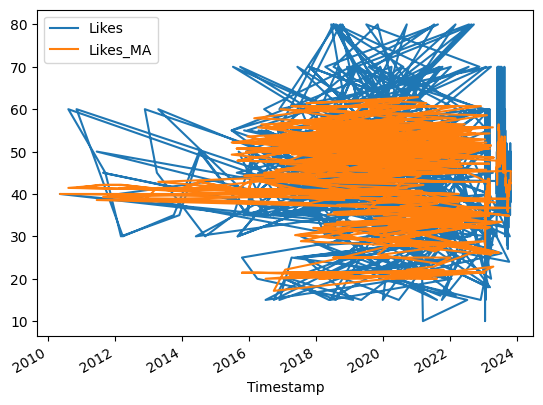

In [72]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)


from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Likes'], model='additive', period=7)
result.plot()
plt.savefig("timeseries decomposition(sentiment dataset).jpg")
plt.show()


df['Likes_MA'] = df['Likes'].rolling(window=7).mean()
df[['Likes', 'Likes_MA']].plot()
plt.savefig("graph showing the likes and moving average of likes per 6 months.jpg")
plt.show()

# Train and test using DecisionTreeClassifier

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder


X = df.drop(['Sentiment', 'Text'], axis=1)


categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [75]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0       1.0        1.0           1.0
support    113.0  180.0  205.0       1.0      498.0         498.0
_______________________________________________
Confusion Matrix: 
 [[113   0   0]
 [  0 180   0]
 [  0   0 205]]

Test Result:
Accuracy Score: 51.40%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.446429   0.547945   0.529412  0.514019    0.507929      0.519410
recall      0.555556   0.465116   0.542169  0.514019    0.520947      0.514019
f1-score    0.495050   0.503145   0.535714  0.514019    0.511303      0.514075
support    45.000000  8

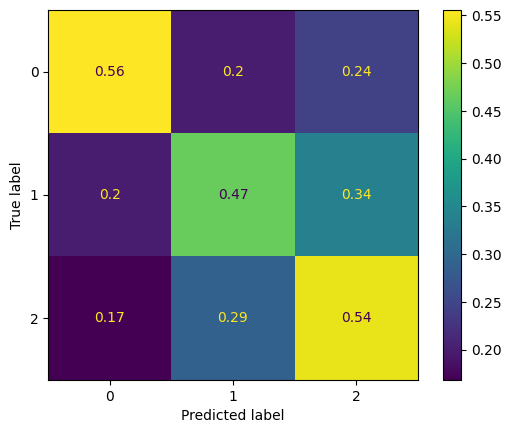

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("decision tree classifier for sentiment.jpg")

In [77]:
from sklearn.metrics import precision_score, recall_score,f1_score

pred = tree_clf.predict(X_test)

print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1_score: ',f1_score(y_test,pred,average='micro'))

Precision:  0.514018691588785
Recall:  0.514018691588785
F1_score:  0.514018691588785


# Train and test using Randomforestclassifier

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = df.drop(['Sentiment'], axis=1)


categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


print("✅ Model Evaluation Metrics:\n")
print("Precision :", precision_score(y_test, y_pred, average='weighted'))
print("Recall    :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score  :", f1_score(y_test, y_pred, average='weighted'))


✅ Model Evaluation Metrics:

Precision : 0.597338400744199
Recall    : 0.5934579439252337
F1 Score  : 0.5918799139593532
